Pytorch로 mnist cnn 모델을 만들어봅시다

sckit learn에서 mnist 데이터를 불러와 봅니다

In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits

digits = load_digits()  

In [2]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [3]:
x = digits.data
y = digits.target

In [4]:
print(x.shape, y.shape)

(1797, 64) (1797,)


In [5]:
# numpy를 tensor로 변환

x = torch.tensor(x, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)

In [6]:
x.size()

torch.Size([1797, 64])

In [7]:
y.size()

torch.Size([1797])

pytorch도 sequentail API를 제공합니다. 

MLP 모델 만들기


In [8]:
net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [9]:
# gpu로 저장

x=x.to('cuda')
y=y.to('cuda')
net = net.to('cuda')

gpu 연산을 할것이라면, optimizer 생성전에 gpu로 변경 필요

아래의 문서의 note 참고

https://pytorch.org/docs/stable/optim.html

In [10]:
# loss function
loss_fn = nn.CrossEntropyLoss()

# 옵티마이저
optimizer = optim.Adam(net.parameters())  # 최적화할 파라미터 정보를 넣어줘야 함

In [11]:
net.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)>

학습하는 코드를 만들어봅시다


In [12]:
import tqdm  # 반복문 실행회수를 보여주는 라이브러리

epoch = 100
losses = []
for i in tqdm.tqdm(range(epoch)):  # 진행상황 확인 가능하다
  optimizer.zero_grad() # gradient 계산 초기화

  y_pred = net(x) # 예측, batch없이 한번에 한 예제임

  # Loss function 계산
  loss = loss_fn(y_pred, y)
  loss.backward()   #backpropagation

  optimizer.step()  #weight update
  
  losses.append(loss.item()) # loss 기록



100%|██████████| 100/100 [00:00<00:00, 445.03it/s]


In [13]:
losses

[2.432705879211426,
 2.382333755493164,
 2.3368539810180664,
 2.295966386795044,
 2.258857488632202,
 2.2253313064575195,
 2.1945135593414307,
 2.165709972381592,
 2.13834547996521,
 2.1117537021636963,
 2.0850818157196045,
 2.0582194328308105,
 2.030879020690918,
 2.003100633621216,
 1.9748059511184692,
 1.9460402727127075,
 1.9165380001068115,
 1.8865137100219727,
 1.8562166690826416,
 1.8254531621932983,
 1.794075846672058,
 1.7620887756347656,
 1.7296050786972046,
 1.6969586610794067,
 1.6638432741165161,
 1.630314588546753,
 1.5965317487716675,
 1.5626041889190674,
 1.5285507440567017,
 1.4943264722824097,
 1.460005521774292,
 1.425642728805542,
 1.3914703130722046,
 1.357560396194458,
 1.3238884210586548,
 1.290574312210083,
 1.2578681707382202,
 1.2257808446884155,
 1.1940433979034424,
 1.162637710571289,
 1.131527304649353,
 1.100737452507019,
 1.0702481269836426,
 1.0401495695114136,
 1.0104691982269287,
 0.9811529517173767,
 0.9521867036819458,
 0.9235158562660217,
 0.8952944

In [14]:
pred_y = net(x)

In [15]:
type(pred_y)

torch.Tensor

In [16]:
pred_y.device

device(type='cuda', index=0)

In [17]:
pred_y = pred_y.detach().to('cpu').numpy()

In [18]:
pred_y.shape

(1797, 10)

In [19]:
import numpy as np
pred_y = np.argmax(pred_y, 1)

In [20]:
pred_y.shape

(1797,)

In [21]:
true_y = y.to('cpu').numpy()

In [22]:
import pandas as pd

yy = pd.DataFrame({'pred_y':pred_y, 'true_y':true_y})

In [23]:
yy

,pred_y,true_y
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
1792,9,9
1793,0,0
1794,8,8
1795,9,9


In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(true_y, pred_y)

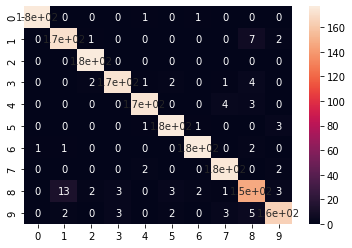

In [25]:
sns.heatmap(cf_matrix, annot=True)